In [1]:
import pandas as pd

# Load Population growth data 
Population_Growth = pd.read_csv('Population_G.csv', skiprows=4)

Population_Growth.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392,-0.157953
1,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.660180,2.732633,2.753248,2.806915,2.840787,...,2.774990,2.802586,2.728159,2.655672,2.688371,2.691134,2.678184,2.607472,2.543757,2.531587
2,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.925952,2.014879,2.078997,2.139651,2.216007,...,3.657576,3.121341,2.581549,2.866492,2.885208,2.908529,3.134747,2.851358,2.534498,2.665628


In [2]:
Population_Growth.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [3]:
# Delete 1960 column
Population_Growth = Population_Growth.drop(['1960'], axis=1)

# Select data for'Rwanda'
country_name = 'Rwanda'
Population_Growth = Population_Growth[Population_Growth['Country Name'] == country_name]


In [4]:
df=Population_Growth.copy()

In [5]:
# Drop unnecessary columns: Keep only year columns
columns_to_exclude = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
df_years_only = df.drop(columns=columns_to_exclude)

# Melt the dataframe to reshape it into 'Year' and 'Population Growth'
df_melted = df_years_only.melt(var_name='Year', value_name='Population Growth')

# Convert 'Year' column to integers if necessary
df_melted['Year'] = df_melted['Year'].astype(int)

In [6]:
df_melted.head(3)

,Year,Population Growth
0,1961,2.677508
1,1962,2.446960
2,1963,2.191826


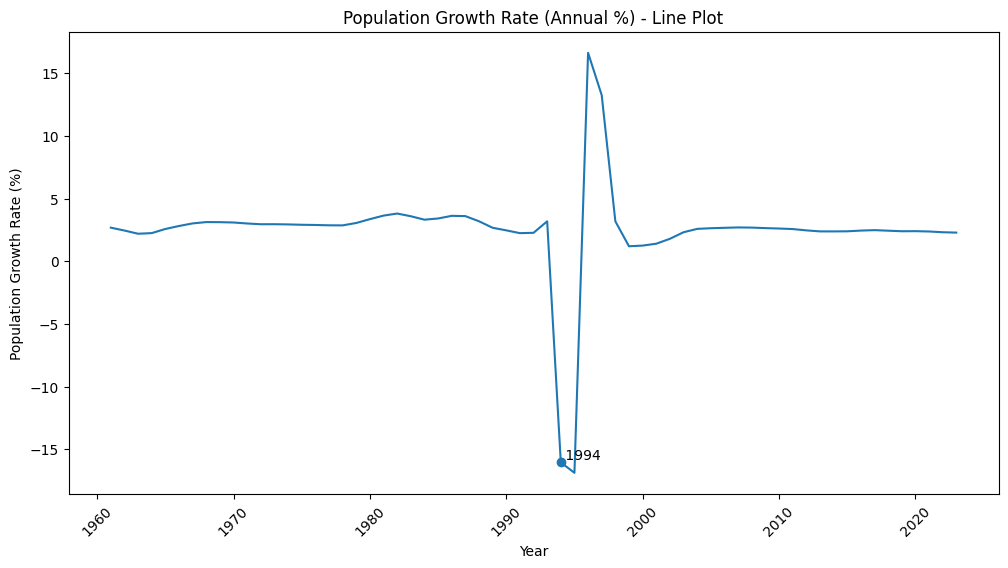

In [7]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the line using Matplotlib
plt.plot(df_melted['Year'], df_melted['Population Growth'])

# Set the chart title and axis labels
plt.title('Population Growth Rate (Annual %) - Line Plot')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Highlight specific years using scatter points and text annotations
highlight_years = [1994]
for year in highlight_years:
    # Filter the DataFrame for the specific year
    year_data = df_melted[df_melted['Year'] == year]
    # Plot a scatter point
    plt.scatter(year, year_data['Population Growth'])
    # Add text annotation
    plt.text(year, year_data['Population Growth'].values[0],
             f' {year}',
             verticalalignment='bottom')

# Display the plot
plt.show()


In [8]:
import pandas as pd

# Calculate the year-to-year changes in population growth
df_melted['Growth Change'] = df_melted['Population Growth'].diff()

# Find the top three years where the population growth decreased the most
top_decreases = df_melted.sort_values(by='Growth Change').head(3)

# Find the top three years where the population growth increased the most
top_increases = df_melted.sort_values(by='Growth Change', ascending=False).head(3)

# Print the tables using pandas styling for better readability and color
print("Top 3 Years with Largest Decreases in Population Growth:")
display(
    top_decreases[['Year', 'Growth Change']]
    .style.set_table_attributes("style='display:inline-block; margin:10px'")
    .background_gradient(cmap='OrRd')  # Apply a red-orange color scale
    .set_caption("Decreases")
)

print("Top 3 Years with Largest Increases in Population Growth:")
display(
    top_increases[['Year', 'Growth Change']]
    .style.set_table_attributes("style='display:inline-block; margin:10px'")
    .background_gradient(cmap='Greens')  # Apply a green color scale
    .set_caption("Increases")
)


Top 3 Years with Largest Decreases in Population Growth:


,Year,Growth Change
33,1994,-19.230668
37,1998,-10.064628
36,1997,-3.378435


Top 3 Years with Largest Increases in Population Growth:


,Year,Growth Change
35,1996,33.506132
32,1993,0.915972
42,2003,0.522423


# Analysis of both Population and Mortality.

In [9]:
# Filter the DataFrame to keep only the columns for the years 2000-2019
years = [str(year) for year in range(2000, 2020)]
Population_G = Population_Growth[years]

# Melt the DataFrame to create 'Year' and 'Value' columns
Population_G2000_2020 = Population_G.melt(var_name='Year', value_name='Population_g')
Population_G2000_2020. head(3)

,Year,Population_g
0,2000,1.245731
1,2001,1.395302
2,2002,1.787982


In [10]:
# Read the Mortality_Traff data
Mortality_Traff = pd.read_csv('Mortality_Traff.csv', skiprows=4)

# Select data for, 'Rwanda'
Mortality_Traff = Mortality_Traff[Mortality_Traff['Country Name'] == country_name]

#remove the columns with misssing values
Mortality_Traff = Mortality_Traff.dropna(axis=1, how='all')


# Melt the DataFrame to create 'Year' and 'Mortality' columns
Mortality_Traff = Mortality_Traff.melt(var_name='Year', value_name='Mortality')

# Merge the Population_G and Mortality_Traff DataFrames using the 'Year' column as the key
combined_data = pd.merge(Population_G2000_2020, Mortality_Traff, on='Year')

In [11]:
#convert combined data into csv
combined_data.to_csv('combined_data.csv', index=False)

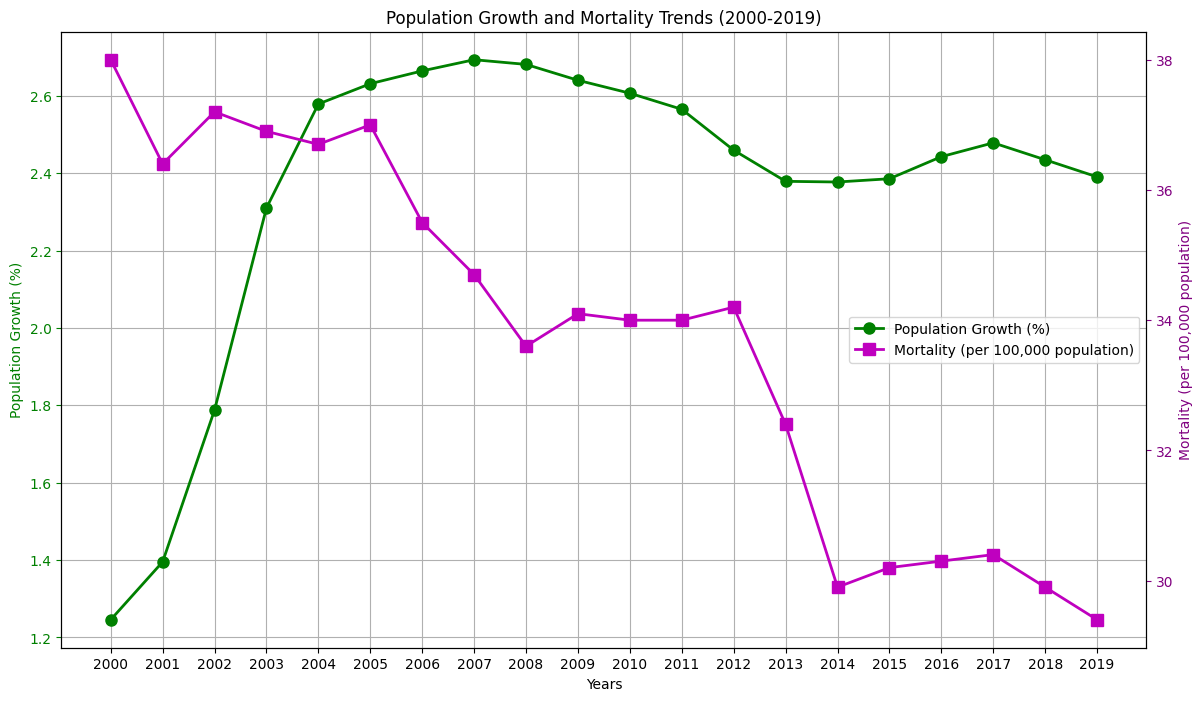

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# data merge
combined_data = pd.merge(Population_G2000_2020, Mortality_Traff, on='Year')

plt.figure(figsize=(14, 8))

# Primary y-axis
ax1 = plt.gca()  
# Secondary y-axis
ax2 = ax1.twinx()

# Plot population growth on the primary y-axis (green line)
pop_line, = ax1.plot(
    combined_data['Year'], 
    combined_data['Population_g'], 
    'g-o', 
    label='Population Growth (%)', 
    markersize=8, 
    linewidth=2
)

# Plot mortality on the secondary y-axis (purple line)
mort_line, = ax2.plot(
    combined_data['Year'], 
    combined_data['Mortality'], 
    'm-s', 
    label='Mortality (per 100,000 population)', 
    markersize=8, 
    linewidth=2
)

# Set chart title and axis labels
ax1.set_title('Population Growth and Mortality Trends (2000-2019)')
ax1.set_xlabel('Years')
ax1.set_ylabel('Population Growth (%)', color='green')
ax2.set_ylabel('Mortality (per 100,000 population)', color='purple')

# Customize tick parameters to match line colors
ax1.tick_params(axis='y', colors='green')
ax2.tick_params(axis='y', colors='purple')

# Build legend
lines = [pop_line, mort_line]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='center right')

# Turn on grid for the primary axis
ax1.grid(True)

plt.show()


In [13]:
print(combined_data['Mortality'].dtype)
print(combined_data['Population_g'].dtype)


object
float64


In [14]:
combined_data['Mortality'] = pd.to_numeric(combined_data['Mortality'], errors='coerce')
combined_data['Population_g'] = pd.to_numeric(combined_data['Population_g'], errors='coerce')


Correlation coefficient between Population Growth and Mortality: -0.37


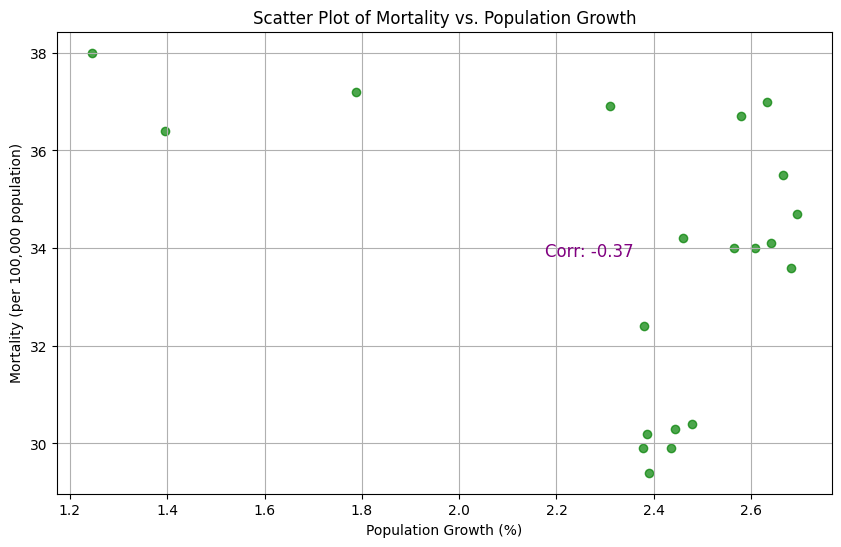

In [15]:
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
coeff = combined_data['Mortality'].corr(combined_data['Population_g'])
print(f'Correlation coefficient between Population Growth and Mortality: {coeff:.2f}')

# Create a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(
    combined_data['Population_g'], 
    combined_data['Mortality'], 
    color='green',  # Changed color to green
    alpha=0.7       # Slight transparency (optional)
)

# Calculate mean positions for annotation
mean_pop_g = combined_data['Population_g'].mean()
mean_mortality = combined_data['Mortality'].mean()

# Annotate the plot with the correlation coefficient at mean positions
plt.text(
    x=mean_pop_g, 
    y=mean_mortality, 
    s=f'Corr: {coeff:.2f}',
    fontsize=12, 
    color='purple',  # Changed annotation color to purple
    horizontalalignment='right', 
    verticalalignment='bottom'
)

plt.title('Scatter Plot of Mortality vs. Population Growth')
plt.xlabel('Population Growth (%)')
plt.ylabel('Mortality (per 100,000 population)')
plt.grid(True)
plt.show()


# Model Divelopment

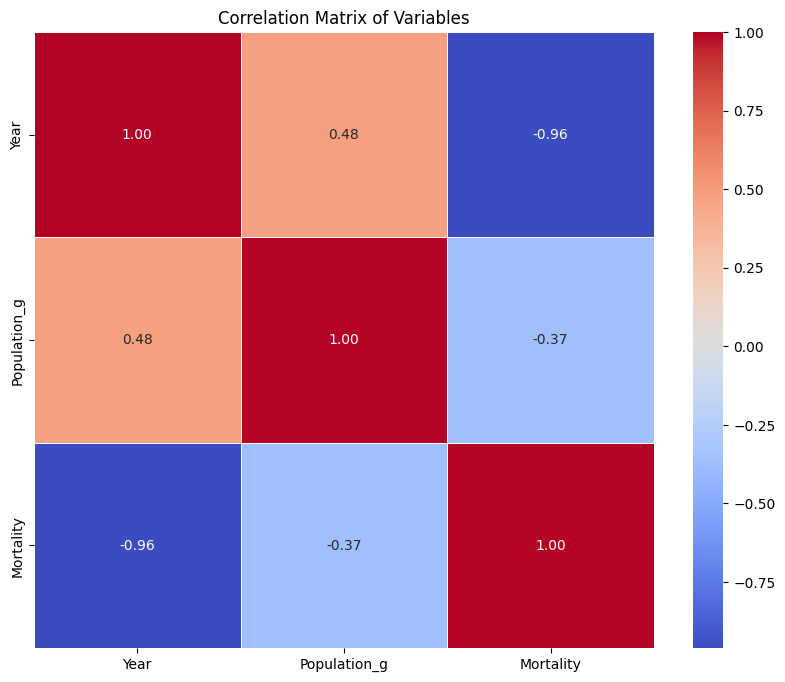

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load data
X = combined_data[['Year']]  # DataFrame with the year
y_population = combined_data['Population_g']
y_mortality = combined_data['Mortality']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the Year feature

# Splitting data for the population growth model
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X_scaled, y_population, test_size=0.2, random_state=42)

# Model 1: Decision Tree Regression for Population Growth
model_pop_growth = DecisionTreeRegressor(random_state=42)
model_pop_growth.fit(X_train_pop, y_train_pop)
predicted_population_test = model_pop_growth.predict(X_test_pop)
mse_pop = mean_squared_error(y_test_pop, predicted_population_test)
r2_pop = r2_score(y_test_pop, predicted_population_test)

# Predict population growth for 2021
future_year = np.array([[2021]])
future_year_scaled = scaler.transform(future_year)  # Scaling the future year
predicted_population_2021 = model_pop_growth.predict(future_year_scaled)

# Prepare data for the mortality model using predicted population growth as input
predicted_population = model_pop_growth.predict(X_scaled)
X_train_mort, X_test_mort, y_train_mort, y_test_mort = train_test_split(predicted_population.reshape(-1, 1), y_mortality, test_size=0.2, random_state=42)

# Model 2: Decision Tree Regression for Mortality Prediction
model_mortality = DecisionTreeRegressor(random_state=42)
model_mortality.fit(X_train_mort, y_train_mort)
predicted_mortality_test = model_mortality.predict(X_test_mort)
mse_mort = mean_squared_error(y_test_mort, predicted_mortality_test)
r2_mort = r2_score(y_test_mort, predicted_mortality_test)

# Output results
print(f"Population Growth Model - MSE: {mse_pop:.3f}, R²: {r2_pop:.3f}")
print(f"Mortality Model - MSE: {mse_mort:.3f}, R²: {r2_mort:.3f}")
print(f"Predicted Population Growth for 2021: {predicted_population_2021[0]:.3f}%")
print(f"Predicted Mortality for 2021 based on predicted population growth: {model_mortality.predict(predicted_population_2021.reshape(1, -1))[0]:.3f}")


Population Growth Model - MSE: 0.112, R²: 0.641
Mortality Model - MSE: 0.345, R²: 0.972
Predicted Population Growth for 2021: 2.391%
Predicted Mortality for 2021 based on predicted population growth: 29.400


C:\Users\Jed\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
import numpy as np
import statsmodels.api as sm

# Add a constant column for the intercept in the regression model
combined_data['intercept'] = 1

# Create the regression model
model = sm.OLS(combined_data['Mortality'], combined_data[['intercept', 'Population_g']])

# Fit the model
results = model.fit()

# Get the p-value for the Population_g coefficient
p_value = results.pvalues['Population_g']

print(f'P_value: {p_value}')

alpha = 0.05

# Perform hypothesis testing
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant relationship between Population_g and Mortality.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant relationship between Population_g and Mortality.")

P_value: 0.11289077747728754
Fail to reject the null hypothesis: There is no statistically significant relationship between Population_g and Mortality.
